1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator

import scipy as scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import trapz

Integral part 1:  9.974844464868127
Integral part 2:  9.975733964090194


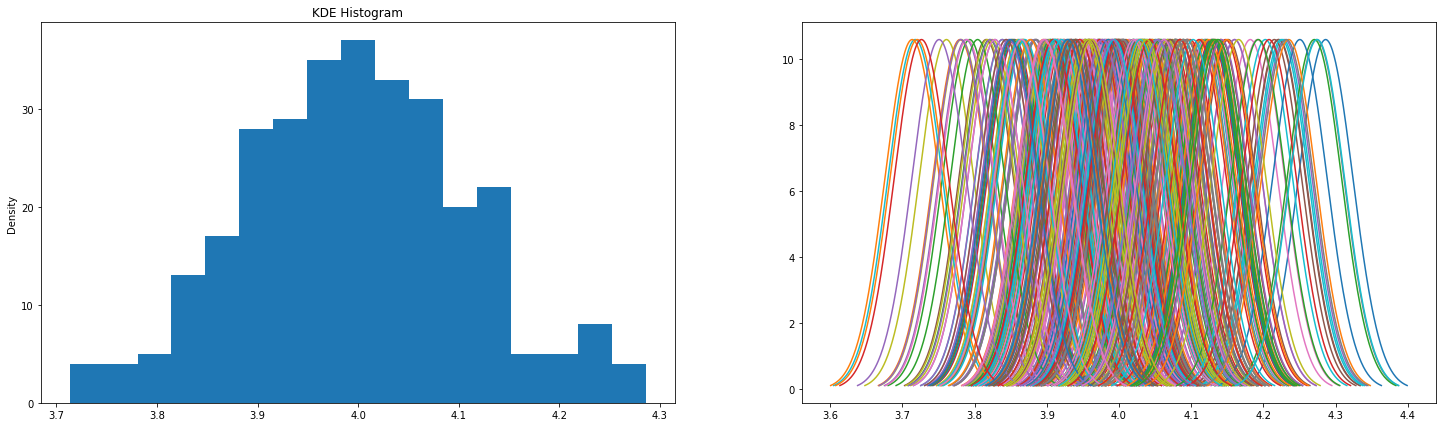

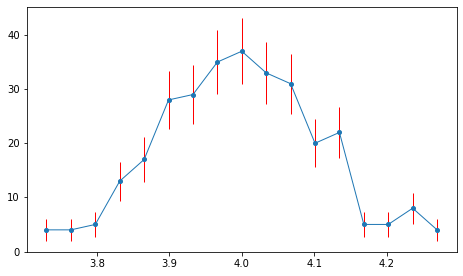

In [2]:
#code ex1

###Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed,
#with a given mean a standard deviation

N=300
mu, sigma = 4, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, N)
###Fill an histogram in pyplot taking properly care about the aesthetic
f, (ax1, ax2) = plt.subplots(1,2, figsize=(25,7))
countsbin, binedges, pat = ax1.hist(x, bins = int(np.sqrt([N])))
ax1.set_title('KDE Histogram')

#-set a proper y axis label
ax1.set_ylabel('Density')

#-set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

#display the histograms as data points with errors (the error being the poisson uncertainty)
mean_binedges = (binedges[:-1] + binedges[1:])/2  
err = np.sqrt(countsbin)

f, (ax3) = plt.subplots(1,1, figsize=(7.7,4.5))
ax3.errorbar(mean_binedges, countsbin, yerr=err, ecolor='red', marker='o', linestyle='-', linewidth=1, markersize=4)

###for every element of x, create a gaussian with the mean corresponding the element value and 
#std as a parameter that can be tuned. The std default value should be: 1.06‚àóùë•.ùë†ùë°ùëë()‚àóùë•.ùë†ùëñùëßùëí^‚àí1/5.
#you can use the scipy function stats.norm() for that.
#In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained

x_sigma=1.06*x.std()*np.power(x.size,-1/5)
x_sum=0
mu_sum=0



for i in range(0,N):
    x_mu= x[i]
    x_values = np.linspace(x_mu - 3*x_sigma, x_mu + 3*x_sigma, N)
    x_temp= stats.norm.pdf(x_values, x_mu, x_sigma)
    x_sum= x_temp + x_sum
    ax2.plot(x_values, x_temp)


###Sum (with np.sum()) all the gaussian functions and normalize the result such that
#the integral matches the integral of the original histogram. 
#For that you could use the scipy.integrate.trapz() method


#p1 - integral of the original histogram - okay checked
 
int_p1 = scipy.integrate.trapz(y=countsbin, x=binedges[:-1]) 

#p2 -integral of gaussian obtained as sum
sum_g=np.sum(x_sum)
sum_g=sum_g/scipy.integrate.trapz(x_sum)*int_p1

print("Integral part 1: ", int_p1)
print("Integral part 2: ", sum_g)




2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

          X_1       X_2       Y_1       Y_2
0   -0.016377  3.314373  1.975901  5.426986
1    0.069439  3.243352  0.506369  4.915722
2    0.578592  3.639229  1.651132  5.549190
3    0.383331  3.089585  2.079690  4.216091
4    0.903863  3.472665  0.976071  4.626989
..        ...       ...       ...       ...
495 -0.846213  2.820241  2.476208  5.367614
496 -0.149199  2.925565  2.082600  4.825288
497 -0.275946  2.691714  2.415109  5.288685
498 -0.742449  2.667950  1.998038  5.574643
499 -0.732926  2.852001  1.612934  3.744821

[500 rows x 4 columns]


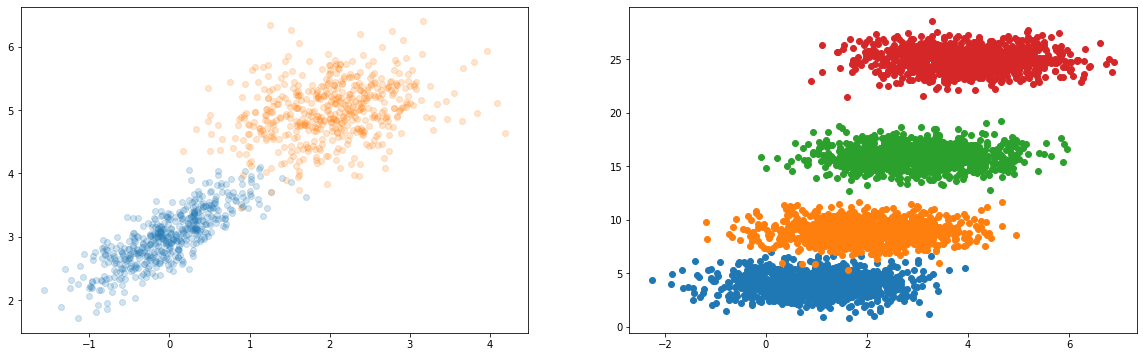

In [4]:
#code ex2 


#---1st part---

#Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian 
#with a given mean and std


def D2_gaussian_dataset(N):
    
    #first category
    mu1 = [0,3] 
    sigma1 = [[0.3,0.2],[0.2,0.2]] 
    x = np.random.multivariate_normal(mu1, sigma1,N).T

    #second category
    mu2 = [2,5] 
    sigma2 = [[0.4,0.1],[0.1,0.2]] 
    y = np.random.multivariate_normal(mu2, sigma2, N).T


    df=pd.DataFrame({'X_1':x[0,:], 'X_2':x[1,:], 'Y_1':y[0,:], 'Y_2':y[1,:]})
    
    return df


df=D2_gaussian_dataset(500)
print(df)
                     
                     
##Produce a scatter plot out of a dataset with two categories
#Display the dataset in a scatter plot marking the two categories with different marker colors.    
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.scatter(df['X_1'], df['X_2'], alpha=0.2)
ax1.scatter(df['Y_1'], df['Y_2'], alpha=0.2)


#---2nd part---

#You can try to make the procedure more general by allowing a given number $n> 2$ of categories
def DN_gaussian_dataset(N,n):
    
    for i in range(N):   
        mu = [(i+1),(i+2)**2]  #MAYBE CHANGE THIS
        sigma = [[1,0],[0,1]] 
        x = np.random.multivariate_normal(mu, sigma,n).T

        df=pd.DataFrame()
        df['x_1']=x[0,:]
        df['x_2']=x[1,:]
        ax2.scatter(df['x_1'], df['x_2'])
    #return df
                            
    
df_N=DN_gaussian_dataset(4, 1000)  #(N,n) with N=number of categories




--2020-11-30 16:26:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:1::a27d:4501, 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:1::a27d:4501|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-30 16:26:21--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc65b4917d6c4397866b19db9304.dl.dropboxusercontent.com/cd/0/inline/BEKkZnxT-yTIci3e9TgT4J3YtEnDX37ZkD_cdeNHW5wzrDiL-VdOAacHS3xMR7yjfmlL9IDLJmBC049dE2m_q4OZ-7RF0qSBMYcPvbM_lk_-Lg/file# [segue]
--2020-11-30 16:26:21--  https://uc65b4917d6c4397866b19db9304.dl.dropboxusercontent.com/cd/0/inline/BEKkZnxT-yTIci3e9TgT4J3YtEnDX37Zk

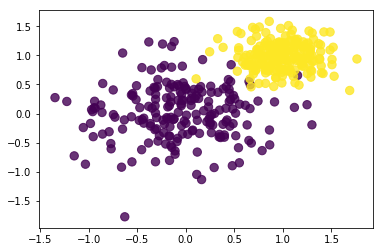

In [5]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2020-11-30 16:26:22--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:1::a27d:4501, 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:1::a27d:4501|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2020-11-30 16:26:22--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucd3eaa3447c32d2182531b87aca.dl.dropboxusercontent.com/cd/0/inline/BEJlsOEharPJ9B9AtL82Dd04vOqQw3HB6jeVUa0gsGWVVdW1cX_5zniSynSSH_yL-8PbGUUYFSAESmchv6D9UdNZhD48Bj81w927T5F3KopFwQ/file# [segue]
--2020-11-30 16:26:23--  https://ucd3eaa3447c32d2182531b87aca.dl.dropboxusercontent.com/cd/0/inline/BEJlsOEharPJ9B9AtL82Dd04vOqQw3HB6jeVUa0gsGWVVdW1cX_5zniSynSSH_yL-8PbGUUYFSA

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


       distances  residuals
0           16.0   1.100000
1            6.3  -1.950000
2            3.4  -7.200000
3            8.4  -4.150000
4            1.7  -6.590000
...          ...        ...
11126       14.4  -0.760000
11127        7.5   0.380000
11128        1.7   0.083333
11129       19.1   0.166667
11130        2.6   0.083333

[11131 rows x 2 columns]


       distances  residuals
0           16.0   1.100000
1            6.3  -1.950000
8            3.3  -0.042857
9            5.3   0.128571
10          15.0   0.085714
...          ...        ...
11126       14.4  -0.760000
11127        7.5   0.380000
11128        1.7   0.083333
11129       19.1   0.166667
11130        2.6   0.083333

[10489 rows x 2 columns]


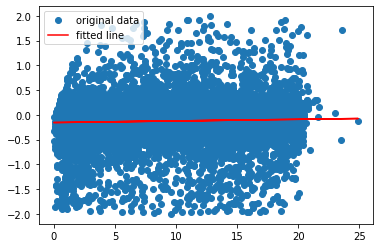

Result with seaborn jointplot
[ 1  3  5  7  9 11 13 15 17 19]


the mean values of the residuals, estimated in slices (bins) of distance:
[-0.17577817 -0.17084732 -0.13333177 -0.09216748 -0.09639134 -0.0695545
 -0.10929132 -0.13740523 -0.14898447 -0.09178551]


the standard deviation of the of the residuals, estimated in slices (bins) of distance:
[0.45279378 0.41760549 0.39136899 0.44972714 0.42350241 0.46112314
 0.48229001 0.45644788 0.42867675 0.39769952]




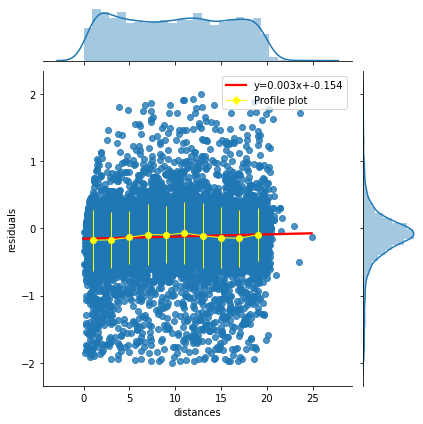

In [7]:
#code ex3 


###Download the following dataset and load it as a pandas dataframe
#Note that you should use the np.load() function to load the file as a numpy array, 
#call the .item() method, and then pass it to the pd.DataFrame() constructor.

file = np.load("residuals_261.npy", allow_pickle=True)
print(file)
print("\n")

x= file.item()['distances']
y= file.item()['residuals']

df=pd.DataFrame({'distances': x, 'residuals':y})


###Inspect the dataset, you'll find two variables (features)
print(df)
print("\n")

###Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
df_selected = df[np.abs(df['residuals']) < 2 ]
print(df_selected)

###perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df_selected['distances'], df_selected['residuals'])

plt.plot(df_selected['distances'], df_selected['residuals'], 'o', label='original data')
plt.plot(df_selected['distances'], intercept + slope*df_selected['distances'], 'r', label='fitted line')
plt.legend()
plt.show()

###plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression.
#The result of the regression should be displayed on the plot 

print("Result with seaborn jointplot")
g = sns.jointplot(x=df_selected['distances'], y=df_selected['residuals'], data=df_selected, kind="reg", line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)});


###Fill 3 numpy arrays
##x, serving as an array of bin centers for the "distance" variable.
#It should range from 0 to 20 with reasonable number of steps (bins)
x=np.arange(1,20,2)
print(x)
##y, the mean values of the "residuals", estimated in slices (bins) of "distance"
statistic, bin_edges, binnumber = stats.binned_statistic(df_selected['distances'],df_selected['residuals'] ,'mean', bins=np.arange(0,22,2))
print("\n")
print("the mean values of the residuals, estimated in slices (bins) of distance:")
print(statistic)
print("\n")

##erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
std_statistic, std_bin_edges, std_binnumber = stats.binned_statistic(df_selected['distances'],df_selected['residuals'] ,'std', bins=np.arange(0,22,2))
print("the standard deviation of the of the residuals, estimated in slices (bins) of distance:")
print(std_statistic)
print("\n")

###Plot the profile plot on top of the scatter plot
#k = sns.jointplot(df_selected['distances'], df_selected['residuals'], data=df_selected)
k = plt.errorbar(x, statistic, yerr=std_statistic, ecolor='yellow', color='yellow', marker='o', mfc='yellow', linestyle='-', linewidth=1, markersize=6)
k.set_label('Profile plot')
plt.legend()
plt.show()
